# Intro
I'm trying to learn the very basics of Machine Learning. My goal here is to train a linear regression model with a subset of columns from this given dataset in order to predict the value of a used car.

reference url for solution: https://www.kaggle.com/ddmngml/trying-to-predict-used-car-value


https://www.kaggle.com/ddmngml/trying-to-predict-used-car-value/notebook


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, preprocessing, svm
from sklearn.preprocessing import StandardScaler, Normalizer
import math
import matplotlib
import seaborn as sns

%matplotlib inline



#autos= pd.read_csv("D:/Aditya/datasets/used-cars-database/autos.csv", encoding='latin-1')
#prices= pd.read_csv("D:/Aditya/datasets/used-cars-database/cnt_km_year_powerPS_minPrice_maxPrice_avgPrice_sdPrice.csv", encoding='latin-1')
#autos.head()

#### Useful Functions

In [3]:
def category_values(dataframe, categories):
    for c in categories:
        print('\n', dataframe.group(by=c)[c].count().sort_values(acending=False))
        print('Nulls:', dataframe[c].isnull().sum())

        
def plot_correlation_map(df):
    corr = df.corr()
    _ , ax = plt.subplots(figsize=(12,10))
    cmap = sns.diverging_palette(220,10, as_camp = True)
    _  =sns.heatmap(
        corr,
        cmap = cmap,
        square = True,
        cbar_kws = {'shrink' : .9},
        ax=ax,
        annot = True,
        annot_kws = {'fontsize' : 12}
    )

#### Preparing Data

##### Reading from file
Just reaing the file and printing some lines.

In [4]:
df= pd.read_csv("D:/Aditya/datasets/used-cars-database/autos.csv", encoding='cp1252')
df.sample(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
43607,2016-03-05 18:57:33,Golf_Blue_Motion,privat,Angebot,7600,test,kombi,2009,manuell,0,golf,150000,8,diesel,volkswagen,nein,2016-02-29 00:00:00,0,70180,2016-04-06 12:45:37
262424,2016-03-17 16:57:37,VW_Mexico_Kaefer_/_TÜV_2017,privat,Angebot,3050,test,NaN,2017,manuell,34,kaefer,50000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,48529,2016-04-07 03:17:26
92703,2016-03-12 00:36:35,Volvo_V40_1.8,privat,Angebot,1299,test,kombi,1999,manuell,116,v40,150000,3,benzin,volvo,nein,2016-03-12 00:00:00,0,17087,2016-04-05 19:45:23
268367,2016-03-07 18:39:24,Volkswagen_Passat_Variant_2.0_Blue_TDI___DSG__...,privat,Angebot,11500,control,kombi,2010,automatik,143,passat,150000,2,diesel,volkswagen,nein,2016-03-07 00:00:00,0,84550,2016-03-20 18:35:52
151598,2016-03-06 09:38:18,peugeot_206_zu_verkaufen..,privat,Angebot,1,control,NaN,2005,manuell,75,2_reihe,150000,6,NaN,peugeot,ja,2016-03-06 00:00:00,0,12045,2016-03-31 09:16:56
37173,2016-04-02 16:41:20,Mercedes_Benz_A_170_CDI_inkl._Sommerreifen,privat,Angebot,3490,control,limousine,2002,manuell,95,a_klasse,90000,4,diesel,mercedes_benz,nein,2016-04-02 00:00:00,0,71065,2016-04-06 15:17:59
316627,2016-03-07 19:43:06,Peugeot_406_Coupe_2.0_16V_Premium,privat,Angebot,4130,control,coupe,1998,manuell,132,4_reihe,100000,12,benzin,peugeot,nein,2016-03-07 00:00:00,0,44623,2016-04-07 09:45:26
56965,2016-03-19 09:53:40,Audi_Cabriolet_2.0,privat,Angebot,1699,test,cabrio,1997,manuell,116,andere,150000,6,benzin,audi,nein,2016-03-19 00:00:00,0,89150,2016-04-06 08:45:58
301019,2016-03-09 07:57:11,BMW_M235i_Coupe_Sport_Aut._M_Performance,privat,Angebot,43990,test,coupe,2016,automatik,326,m_reihe,20000,3,benzin,bmw,nein,2016-03-09 00:00:00,0,84066,2016-04-07 07:15:37
340339,2016-04-04 15:47:16,Bmw_318_Klima__Leder__Sitzheizung__El_verdeckt__,privat,Angebot,2900,test,cabrio,1999,manuell,85,3er,150000,5,NaN,bmw,nein,2016-04-04 00:00:00,0,71083,2016-04-06 17:17:42


###### Let's see some info from numeric fields

In [5]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


#### Dropping some useless columns 
Come columns can be dropped here.

In [6]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

## Dropping some useless columns

some columns can already be dropped.

In [7]:
print(df.seller.unique())
print(df.offerType.unique())
print(df.abtest.unique())
print(df.nrOfPictures.unique())

['privat' 'gewerblich']
['Angebot' 'Gesuch']
['test' 'control']
[0]


Seller has only one value, while offerType and abTest has no relevance for the analysis. So far, I still don't know how to use the dateCrawled column.

Therefore I modify the dataframe dropping all those features.

I remove lastseen, dateCreated and postalCode as well as I don't think they will be useful for a price prediction.

In [8]:
df.drop(['seller','offerType','abtest','dateCrawled','nrOfPictures','lastSeen','postalCode','dateCreated'], axis='columns', inplace=True)

## Cleaning data
Cleaning data from duplicates, NANs and selecting reasonable ranges for columns.

In [14]:
print("Too new: %d" % df.loc[df.yearOfRegistration >=2017].count()['name'])
print("Too old: %d" % df.loc[df.yearOfRegistration <=1950].count()['name'])
print("Too Cheap: %d" % df.loc[df.price <100].count()['name'])
print("Too expensive: " , df.loc[df.price > 150000].count()['name'])
print("Too few km: " , df.loc[df.kilometer < 5000].count()['name'])
print("Too many kms driven: " , df.loc[df.kilometer > 200000].count()['name'])
print("Too few PS: " , df.loc[df.powerPS < 10].count()['name'])
print("Too many PS: " , df.loc[df.powerPS > 500].count()['name'])
print("Fuel types: " , df['fuelType'].unique())
#print("Offer types: " , df['offerType'].unique())
#print("Sellers: " , df['seller'].unique())
print("Damages: " , df['notRepairedDamage'].unique())
#print("Pics: " , df['nrOfPictures'].unique()) # nrOfPictures : number of pictures in the ad (unfortunately this field contains everywhere a 0 and is thus useless (bug in crawler!) )
#print("Postale codes: " , df['postalCode'].unique())
print("Vehicle types: " , df['vehicleType'].unique())
print("Brands: " , df['brand'].unique())

# Cleaning data
#valid_models = df.dropna()

#### Removing the duplicates
dedups = df.drop_duplicates(['name','price','vehicleType','yearOfRegistration'
                         ,'gearbox','powerPS','model','kilometer','monthOfRegistration','fuelType'
                         ,'notRepairedDamage'])

#### Removing the outliers
dedups = dedups[
        (dedups.yearOfRegistration <= 2016) 
      & (dedups.yearOfRegistration >= 1950) 
      & (dedups.price >= 100) 
      & (dedups.price <= 150000) 
      & (dedups.powerPS >= 10) 
      & (dedups.powerPS <= 500)]

print("-----------------\nData kept for analisys: %d percent of the entire set\n-----------------" % (100 * dedups['name'].count() / df['name'].count()))


Too new: 14680
Too old: 311
Too Cheap: 13320
Too expensive:  232
Too few km:  0
Too many kms driven:  0
Too few PS:  41040
Too many PS:  835
Fuel types:  ['benzin' 'diesel' nan 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
Damages:  [nan 'ja' 'nein']
Vehicle types:  [nan 'coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi'
 'andere']
Brands:  ['volkswagen' 'audi' 'jeep' 'skoda' 'bmw' 'peugeot' 'ford' 'mazda'
 'nissan' 'renault' 'mercedes_benz' 'opel' 'seat' 'citroen' 'honda' 'fiat'
 'mini' 'smart' 'hyundai' 'sonstige_autos' 'alfa_romeo' 'subaru' 'volvo'
 'mitsubishi' 'kia' 'suzuki' 'lancia' 'porsche' 'toyota' 'chevrolet'
 'dacia' 'daihatsu' 'trabant' 'saab' 'chrysler' 'jaguar' 'daewoo' 'rover'
 'land_rover' 'lada']
-----------------
Data kept for analisys: 81 percent of the entire set
-----------------


## Working on the null vlaues

Checking if there are NaNs to be fixed or dropped.

In [15]:
dedups.isnull().sum()

name                       0
price                      0
vehicleType            10818
yearOfRegistration         0
gearbox                 5260
powerPS                    0
model                  11347
kilometer                  0
monthOfRegistration        0
fuelType               15400
brand                      0
notRepairedDamage      42124
dtype: int64

Some decisions to take for the nulls in the following fields: vehicleType (37422 nulls), gearbox (19803 nulls), model (20288 nulls), fuelType (33081 nulls), notRepairedDamage (70770 nulls).



model-brand-vehicleType

If we have the model we could determine the brand and the vehicleType calculating the mode for the corresponding fields in the rest of the dataset. The opposite combinations are not true. So I think the actions should be:

| vehicleType | brand | model | Action
| ---           | ---     | ---     |
| null        |  null | [value] | Set the other fields
| null        | [value] | null  | Delete
| [value]       |  null | null  | Delete


**So far, I'll drop all the NaNs in these 3 fields.**

**notRepairedDamage** Those with null notRepairedDamage field could be set to "not-declared" value for example.

**fuelType** Null fuelTypes could be set to "not-declared" value again.

**gearbox** Null fuelTypes could be set to "not-declared" value again.

In [17]:
dedups['notRepairedDamage'].fillna(value='not-declared', inplace=True)
dedups['fuelType'].fillna(value='not-declared', inplace=True)
dedups['gearbox'].fillna(value='not-declared', inplace=True)
dedups['vehicleType'].fillna(value='not-declared', inplace=True)
dedups['model'].fillna(value='not-declared', inplace=True)

Checking if all the nulls have been filled or dropped.

In [18]:
dedups.isnull().sum()

name                   0
price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

At this point, our data is clean. Let's do some visualizations now.

## Visualizations

### Categories distribution

Let's see some charts to understand how data is distributed across the categories.

gearbox
manuell         231997
automatik        66876
not-declared      5260
Name: gearbox, dtype: int64


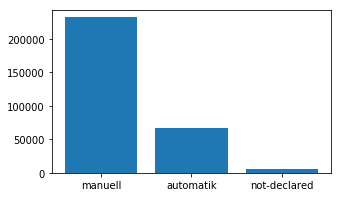

model
golf            24846
andere          21733
3er             17704
not-declared    11347
polo            10477
Name: model, dtype: int64


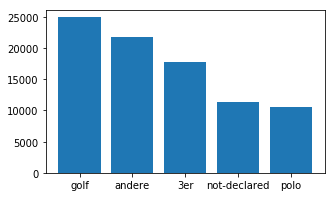

brand
volkswagen       64853
bmw              34441
opel             31757
mercedes_benz    29562
audi             27984
Name: brand, dtype: int64


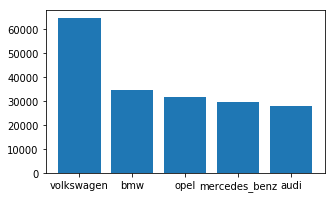

vehicleType
limousine     84843
kleinwagen    68415
kombi         59863
bus           26986
cabrio        20921
Name: vehicleType, dtype: int64


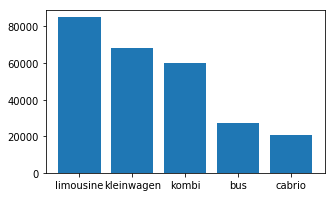

fuelType
benzin          189919
diesel           93299
not-declared     15400
lpg               4646
cng                474
Name: fuelType, dtype: int64


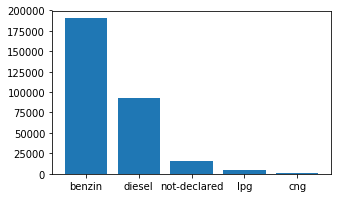

notRepairedDamage
nein            233684
not-declared     42124
ja               28325
Name: notRepairedDamage, dtype: int64


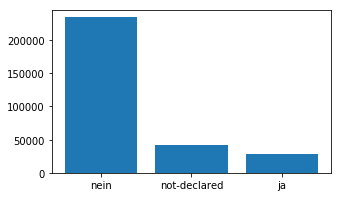

In [20]:
categories = ['gearbox','model','brand','vehicleType','fuelType','notRepairedDamage']

for i,c in enumerate(categories):
    v=dedups[c].unique()
    
    
    g=dedups.groupby(by=c)[c].count().sort_values(ascending=False)
    r=range(min(len(v),5))
    
    
    print(g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r,g.head())
    plt.xticks(r,g.index)
    plt.show()

### Feature engineering



Adding the name length to see how much does a long description influence the price

C:\Users\amansana\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\amansana\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


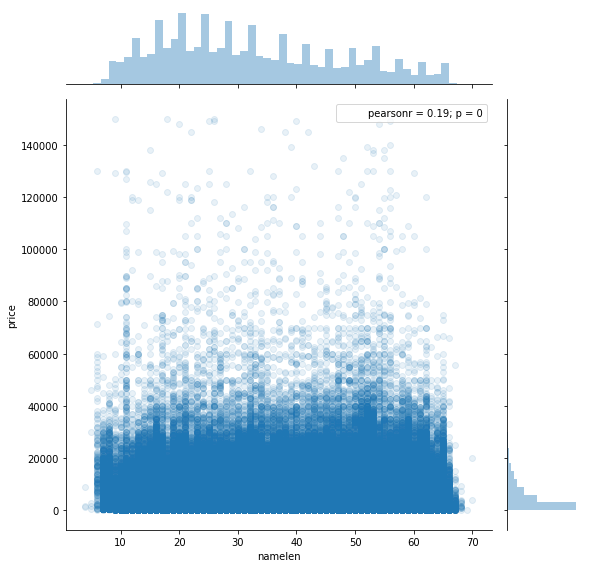

In [25]:
dedups['namelen']=[min(70,len(n)) for n in dedups['name']]

ax = sns.jointplot(x='namelen',
                 y='price',
                data=dedups[['namelen','price']],
#                data=dedups[['namelen','price']][dedups['model']=='golf'],
                 alpha=0.1,
                 size=8)

It seems that a name length between 15 and 30 characters is better for the sale price. An explanation could be that a longer name includes more optionals and accessories and therefore the price is obviously higher. Very short and very long names do not work well.

In [26]:
labels = ['name', 'gearbox', 'notRepairedDamage', 'model', 'brand', 'fuelType', 'vehicleType']
les = {}

for l in labels:
    les[l] = preprocessing.LabelEncoder()
    les[l].fit(dedups[l])
    tr = les[l].transform(dedups[l]) 
    dedups.loc[:, l + '_feat'] = pd.Series(tr, index=dedups.index)

labeled = dedups[ ['price'
                        ,'yearOfRegistration'
                        ,'powerPS'
                        ,'kilometer'
                        ,'monthOfRegistration'
                        , 'namelen'] 
                    + [x+"_feat" for x in labels]]

In [27]:
len(labeled['name_feat'].unique()) / len(labeled['name_feat'])

0.6224184813880769

Labels for the name column account for 62% of the total. I think it's too much, so I remove the feature.



In [28]:
labeled.drop(['name_feat'], axis='columns', inplace=True)

C:\Users\amansana\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### Correlations

Let's see how the features are correlated to each other and, more important, with the price.

TypeError: diverging_palette() got an unexpected keyword argument 'as_camp'

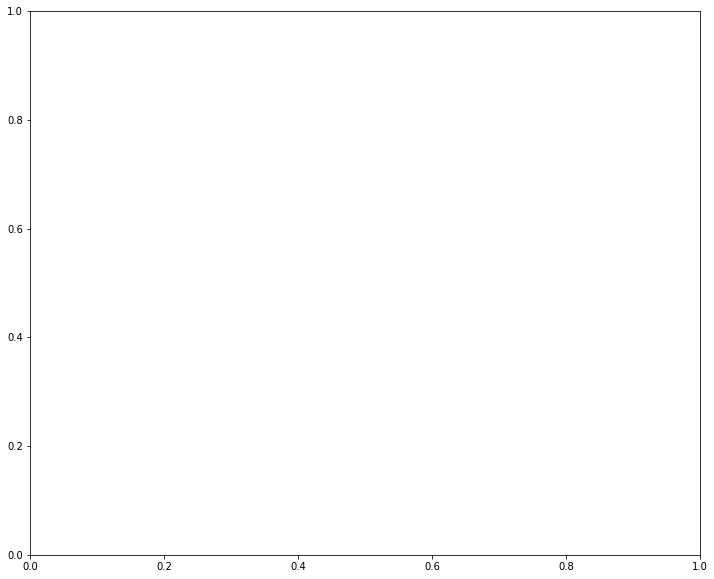

In [33]:
plot_correlation_map(labeled)
labeled.corr()

This is the list of the most influencing features for the price



In [34]:
labeled.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS                   0.573037
kilometer                 0.444440
yearOfRegistration        0.385264
gearbox_feat              0.297746
namelen                   0.186254
brand_feat                0.105694
fuelType_feat             0.055978
monthOfRegistration       0.044782
model_feat                0.012514
vehicleType_feat          0.010906
notRepairedDamage_feat    0.002440
Name: price, dtype: float64

## Playing with different models
### Prepare data for training
Here I split the dataset in train and validation data and tune the right-skewed sale price column.

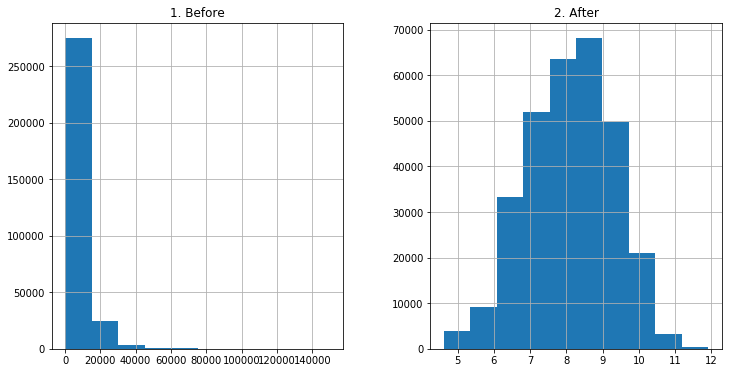

In [35]:
Y = labeled['price']
X = labeled.drop(['price'], axis='columns', inplace=False)


matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"1. Before":Y, "2. After":np.log1p(Y)})
prices.hist()

Y = np.log1p(Y)

### Basic imports and functions
Trying with some model from scikit learn: LinearRegression, LR with L2 regularization and others.

In [36]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score, train_test_split

def cv_rmse(model, x, y):
    r = np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5))
    return r

# Percent of the X array to use as training set. This implies that the rest will be test set
test_size = .33

#Split into train and validation
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=test_size, random_state = 3)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

r = range(2003, 2017)
km_year = 10000

(203769, 11) (100364, 11) (203769,) (100364,)


## Random forests
I use the GridSearch to set the optimal parameteres for the regressor, then train the final model.

I've removed the other parameters to quickly make this point pass online while I keep working on many parameters offline.

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [3]
              , "min_samples_split" : [3]
              , "max_depth": [10]
              , "n_estimators": [500]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  2.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  2.0min finished


**Predicting samples**

In [41]:
print(gs.best_score_)
print(gs.best_params_)

0.8277018883757181
{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 500}


In [42]:
bp = gs.best_params_
forest = RandomForestRegressor(criterion=bp['criterion'],
                              min_samples_leaf=bp['min_samples_leaf'],
                              min_samples_split=bp['min_samples_split'],
                              max_depth=bp['max_depth'],
                              n_estimators=bp['n_estimators'])
forest.fit(X_train, y_train)
# Explained variance score: 1 is perfect prediction
print('Score: %.2f' % forest.score(X_val, y_val))

Score: 0.83
